In [19]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, f1_score
from sklearn.metrics import mean_squared_error

In [20]:
df_clean=pd.read_csv(r"C:\Users\Dima\Downloads\Dima\Final_1.csv",dtype={'col':np.float})
df_clean.rename(columns={'Unnamed: 0':'Country'},inplace=True)
df_clean.set_index('Country',inplace=True)
df_clean.drop('Most Obese Countries',axis=1,inplace=True) 
df_clean.drop('Birth Life Expectancy ',axis=1,inplace=True) 


df_clean

,Alcohol,All Cancers,Anemia,Asthma,Birth Trauma,Bladder Cancer,Breast Cancer,Cervical Cancer,Colon-Rectum Cancers,Congenital Anomalies,...,Depression Rates by Country,Diabetes Rates by Country,Health Care Costs by Country,Infant Mortality Rate by Country,Lactose Intolerance by Country,Obesity Rates by Country,Suicide Rate by Country,Total Fertility Rate,Vaccination Rates by Country,Zika Virus Countries
Country,,,,,,,,,,,,,,,,,,,,,
Belarus,11247.529167,1498.662628,68.035126,37.797292,160.638491,3.444350e+05,208.830038,1611.109571,1920.089105,59290.769618,...,0.056000,0.06,9432800.0,2.069402e+04,9432800.0,0.245,2003.256476,1.4,0.980000,No mosquitoes that spread Zika
Mongolia,44272.182388,577.962527,197.680887,97.037384,34.094216,3.481675e+04,206.532270,145.228247,1920.089105,9304.442678,...,0.042000,0.07,3378078.0,1.023846e+06,3378078.0,0.206,586.813910,2.9,0.990000,No mosquitoes that spread Zika
Russia,188532.731458,21992.323423,4378.338607,1439.287479,738.639258,1.061629e+06,1573.885627,24152.153461,5166.079955,298435.974790,...,0.055000,0.06,145805947.0,1.023846e+06,145805947.0,0.231,3897.714397,1.6,0.970000,With mosquitoes but no reported Zika cases
Guatemala,44272.182388,2984.733629,498.052790,1439.287479,93.160954,1.313068e+05,1270.213771,734.538288,990.730910,15274.813277,...,0.037000,0.13,18584039.0,3.593863e+05,18584039.0,0.212,1057.018512,2.9,0.920000,Current or past transmission but no Zika outbreak
Slovenia,44272.182388,120.578404,4378.338607,2.078938,77.752281,3.444350e+05,32.015645,309.345974,47.607680,1196.220925,...,0.051000,0.06,2078034.0,3.658931e+03,2078034.0,0.202,411.629724,1.6,0.920000,No mosquitoes that spread Zika
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,111929.631992,4756.146380,4378.338607,1439.287479,738.639258,6.805329e+05,2326.392038,2567.294101,6414.612356,59290.769618,...,0.040000,0.06,98953541.0,1.625554e+06,98953541.0,0.021,7300.393425,2.0,0.960000,Current or past transmission but no Zika outbreak
Antigua And Barbuda,118.621398,4756.146380,1.890030,1439.287479,1.047840,5.816787e+02,7.511154,13.866746,4.064053,75.983111,...,0.051000,0.12,99509.0,5.268580e+02,99509.0,0.189,0.391716,2.0,0.990000,Current or past transmission but no Zika outbreak
United Arab Emirates,7174.497611,1677.412179,1018.711406,93.958819,344.185990,6.132742e+04,144.399869,844.640331,1920.089105,59290.769618,...,0.051000,0.16,10081785.0,5.558406e+04,10081785.0,0.317,632.985728,1.4,0.960000,No mosquitoes that spread Zika


In [21]:
def outlier_detection_zscore_dist(df):
    df_copy =df.copy()
    for col in df_copy:
        if (df_copy[col].dtypes!=object):
            z_score=(df_copy[col]-df_copy[col].mean())/df_copy[col].std()
            outliers=abs(z_score) >3
            df_copy.loc[outliers,[col]]=np.nan
    return df_copy
    


values_zscore=outlier_detection_zscore_dist(df_clean)
for i in values_zscore.columns:
    print(values_zscore[i].isna().sum(),  i)

1 Alcohol
2 All Cancers
1 Anemia
3 Asthma
3 Birth Trauma
2 Bladder Cancer
4 Breast Cancer
5 Cervical Cancer
2 Colon-Rectum Cancers
2 Congenital Anomalies
3 Coronary Heart Disease
1 Diabetes Mellitus
1 Diarrhoeal diseases
2 Drownings
6 Drug Use
1 Endocrine Disorders
6 Falls
2 HIV/AIDS
5 Hypertension
2 Inflammatory/Heart
2 Kidney Disease
2 Leukemia
4 Liver Cancer
1 Liver Disease
1 Low Birth Weight
3 Malaria
3 Malnutrition
2 Multiple Sclerosis
4 Oesophagus Cancer
4 Oral Cancer
3 Other Neoplasms
2 Ovary Cancer
2 Pancreas Cancer
1 Peptic Ulcer Disease
2 Prostate Cancer
1 Rheumatic Heart Disease
2 Skin Cancers
2 Skin Disease
3 Stomach Cancer
2 Stroke
1 Suicide
2 Tuberculosis
3 Uterin Cancer
1 Infant Mortality Rates 
3 Internet Users 
2 Gross Domestic Product (GDP) 
2 Investments 
3 Irrigated Land 
6 Maternal Mortality Rates 
3 Telephone Lines 
3 Roadways 
1 Electricity Consumption 
0 Highest Points 
1 Exports 
2 Taxes 
2 Mobile Cellular Telephones 
0 Electrification 
2 Total Fertility Rates 

In [22]:
def outlier_detection_iqr(df):
    df_copy=df.copy()
    for col in df_copy:
        if df_copy[col].dtypes!=object:
            q1=np.percentile(df_copy[col],25)
            q3=np.percentile(df_copy[col],75)
            IQR=q3-q1
            df_copy.loc[(df_copy[col] <q1-1.5*IQR)| (df_copy[col]>q3+1.5*IQR), [col]]=np.nan
    return df_copy
    
values_iqr_score=outlier_detection_iqr(df_clean)
for i in values_iqr_score.columns:
    print(values_iqr_score[i].isna().sum(),  i)    

11 Alcohol
12 All Cancers
6 Anemia
9 Asthma
11 Birth Trauma
10 Bladder Cancer
18 Breast Cancer
16 Cervical Cancer
11 Colon-Rectum Cancers
8 Congenital Anomalies
9 Coronary Heart Disease
4 Diabetes Mellitus
9 Diarrhoeal diseases
10 Drownings
9 Drug Use
5 Endocrine Disorders
14 Falls
13 HIV/AIDS
12 Hypertension
10 Inflammatory/Heart
12 Kidney Disease
9 Leukemia
9 Liver Cancer
5 Liver Disease
8 Low Birth Weight
14 Malaria
11 Malnutrition
5 Multiple Sclerosis
9 Oesophagus Cancer
14 Oral Cancer
10 Other Neoplasms
8 Ovary Cancer
10 Pancreas Cancer
8 Peptic Ulcer Disease
2 Prostate Cancer
11 Rheumatic Heart Disease
10 Skin Cancers
5 Skin Disease
9 Stomach Cancer
9 Stroke
12 Suicide
14 Tuberculosis
13 Uterin Cancer
6 Infant Mortality Rates 
21 Internet Users 
4 Gross Domestic Product (GDP) 
5 Investments 
14 Irrigated Land 
19 Maternal Mortality Rates 
20 Telephone Lines 
20 Roadways 
3 Electricity Consumption 
4 Highest Points 
4 Exports 
16 Taxes 
21 Mobile Cellular Telephones 
31 Electrific

In [23]:
def change_and_fill_mean(df):
    df_copy=df.copy()
    for i in df_copy.columns:
        if(df_copy[i].dtypes!=object):
            df_copy[i].fillna(df_copy[i].mean(), inplace=True)
    return df_copy
    
values_iqr_score=change_and_fill_mean(values_iqr_score)
values_zscore=change_and_fill_mean(values_zscore)



In [24]:
def give_cat_num(df):
    df_copy=df.copy()
    index_object=[]
    for i in df_copy.columns:
        if(df_copy[i].dtypes==object):
            df_copy[i]=pd.factorize(df_copy[i])[0]
            index_object.append(i)
    return df_copy

values_iqr_score=give_cat_num(values_iqr_score)
values_zscore=give_cat_num(values_zscore)





In [25]:
for i in values_zscore.columns:
    if(i!='Life Expectancy'):
        score=values_zscore['Life Expectancy'].corr(values_zscore[i])
        print(score , i)
        if(score>=0.3 or score<=-0.3):
            pass  


0.015036280498607456 Alcohol
-0.024437224615396495 All Cancers
-0.17857079432550385 Anemia
-0.30800655668628224 Asthma
0.09631098567705294 Birth Trauma
-0.12692122258373578 Bladder Cancer
-0.302478692528576 Breast Cancer
0.1544208839449643 Cervical Cancer
-0.09648623012255257 Colon-Rectum Cancers
-0.09872522450591395 Congenital Anomalies
-0.2984523982325581 Coronary Heart Disease
-0.21214163975661257 Diabetes Mellitus
-0.17517003525981528 Diarrhoeal diseases
0.10869340087059338 Drownings
-0.04963878574799513 Drug Use
0.0002618795835673514 Endocrine Disorders
-0.3331282419733367 Falls
-0.16409556379037338 HIV/AIDS
-0.15379587501468162 Hypertension
-0.12692122258373578 Inflammatory/Heart
0.051391332037024506 Kidney Disease
0.04920436368765509 Leukemia
-0.18795385058454084 Liver Cancer
-0.1158484198625608 Liver Disease
0.11987302655219274 Low Birth Weight
-0.3620698738837806 Malaria
0.11934669354652645 Malnutrition
-0.11279314174081934 Multiple Sclerosis
-0.0259837800432001 Oesophagus Can

In [26]:
for i in values_iqr_score.columns:
    if(i!='Life Expectancy'):
        score=values_iqr_score['Life Expectancy'].corr(values_iqr_score[i])
        print(score , i)
        if(score>=0.3 or score<=-0.3):
            pass  

0.009877571379909024 Alcohol
-0.08258519953075458 All Cancers
-0.19314872072992184 Anemia
-0.3763488784975814 Asthma
0.023416245659799155 Birth Trauma
-0.1108255508221722 Bladder Cancer
-0.17628495757045115 Breast Cancer
0.056620630142877694 Cervical Cancer
-0.1589551463950695 Colon-Rectum Cancers
-0.1530570859850209 Congenital Anomalies
-0.31558850036657277 Coronary Heart Disease
-0.3123715888324249 Diabetes Mellitus
-0.2392789291462712 Diarrhoeal diseases
0.03155482551251758 Drownings
0.013186794267113756 Drug Use
-0.033106793058676365 Endocrine Disorders
-0.42030294918834366 Falls
-0.1837546547764528 HIV/AIDS
-0.1835835319243976 Hypertension
-0.1108255508221722 Inflammatory/Heart
0.06450586627902606 Kidney Disease
-0.028308639344840864 Leukemia
-0.28159014210335354 Liver Cancer
-0.2319401891993615 Liver Disease
0.21972526153205826 Low Birth Weight
-0.24831614731492438 Malaria
0.018769472302172314 Malnutrition
-0.20620589230057632 Multiple Sclerosis
-0.09808298259008276 Oesophagus Ca

In [27]:
machin_value_1=[]
for i in values_zscore.columns:
    if(i!='Life Expectancy'):
        score=values_zscore['Life Expectancy'].corr(values_zscore[i])
        if(score>=0.3 or score<=-0.3):
            print("Taken To The machine Learinging :", i)
            machin_value_1.append(i)
machin_value_1.append('Life Expectancy')  
values_zscore[machin_value_1]

Taken To The machine Learinging : Asthma
Taken To The machine Learinging : Breast Cancer
Taken To The machine Learinging : Falls
Taken To The machine Learinging : Malaria
Taken To The machine Learinging : Maternal Mortality Rates 
Taken To The machine Learinging : Electrification 
Taken To The machine Learinging : Urban Population 
Taken To The machine Learinging : Median Age 
Taken To The machine Learinging : Young Population 
Taken To The machine Learinging : Best Countries To Live in
Taken To The machine Learinging : Cheapest Countries To Live in
Taken To The machine Learinging : Corporate Tax Rates by Country
Taken To The machine Learinging : Fourth World Countries
Taken To The machine Learinging : GDP per Capita by Country
Taken To The machine Learinging : Global North Countries
Taken To The machine Learinging : Global South Countries
Taken To The machine Learinging : Most Expensive Countries To Live in
Taken To The machine Learinging : Poorest Countries in the World
Taken To The 

,Asthma,Breast Cancer,Falls,Malaria,Maternal Mortality Rates,Electrification,Urban Population,Median Age,Young Population,Best Countries To Live in,...,Richest Countries in the World,Average Height by Country,Countries by IQ - Average IQ by Country,Circumcision by Country,Depression Rates by Country,Obesity Rates by Country,Total Fertility Rate,Vaccination Rates by Country,Zika Virus Countries,Life Expectancy
Country,,,,,,,,,,,,,,,,,,,,,
Belarus,37.797292,208.830038,578.998711,1349.872661,188.986460,1.0000,0.80,40.9,0.161000,0.823000,...,6.131000e+10,178.69,101.60,0.003,0.056000,0.245,1.4,0.980000,0,75.058
Mongolia,97.037384,206.532270,98.348700,1349.872661,1475.230500,0.9100,0.69,29.8,0.270000,0.737000,...,1.331000e+10,170.67,91.03,0.044,0.042000,0.206,2.9,0.990000,0,70.334
Russia,1439.287479,1573.885627,398.286429,160.527908,24808.858540,1.0000,0.75,40.3,0.172000,0.824000,...,1.480000e+12,176.65,96.29,0.118,0.055000,0.231,1.6,0.970000,1,72.842
Guatemala,1439.287479,1270.213771,243.651725,2653.295621,17019.789600,0.9200,0.52,23.2,0.337000,0.663000,...,7.760000e+10,164.36,47.72,0.001,0.037000,0.212,2.9,0.920000,2,74.828
Slovenia,2.078938,32.015645,3.534195,1349.872661,145.525660,1.0000,0.55,44.9,0.265113,0.917000,...,5.355000e+10,180.98,98.60,0.085,0.051000,0.202,1.6,0.920000,0,81.696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,1439.287479,2326.392038,564.563758,107.072437,41855.588970,1.0000,0.37,31.9,0.226000,0.704000,...,3.429400e+11,168.89,89.53,0.002,0.040000,0.021,2.0,0.960000,2,75.670
Antigua And Barbuda,1439.287479,7.511154,0.215444,1.135976,39613.258351,1.0000,0.24,32.7,0.225000,0.778000,...,1.370000e+09,178.84,70.48,0.006,0.051000,0.189,2.0,0.990000,2,77.340
United Arab Emirates,93.958819,144.399869,252.205251,1349.872661,296.712060,1.0000,0.87,38.4,0.145000,0.890000,...,3.588700e+11,174.08,82.05,0.760,0.051000,0.317,1.4,0.960000,0,78.318


In [28]:
machin_value_2=[]
for i in values_iqr_score.columns:
    if(i!='Life Expectancy'):
        score=values_iqr_score['Life Expectancy'].corr(values_iqr_score[i])
        if(score>=0.3 or score<=-0.3):
            print("Taken To The machine Learinging :", i)
            machin_value_2.append(i)
machin_value_2.append('Life Expectancy')  
values_iqr_score[machin_value_2]

Taken To The machine Learinging : Asthma
Taken To The machine Learinging : Coronary Heart Disease
Taken To The machine Learinging : Diabetes Mellitus
Taken To The machine Learinging : Falls
Taken To The machine Learinging : Peptic Ulcer Disease
Taken To The machine Learinging : Suicide
Taken To The machine Learinging : Maternal Mortality Rates 
Taken To The machine Learinging : Electrification 
Taken To The machine Learinging : Urban Population 
Taken To The machine Learinging : Petroleum Consumption 
Taken To The machine Learinging : Median Age 
Taken To The machine Learinging : Young Population 
Taken To The machine Learinging : Best Countries To Live in
Taken To The machine Learinging : Cheapest Countries To Live in
Taken To The machine Learinging : Corporate Tax Rates by Country
Taken To The machine Learinging : Fourth World Countries
Taken To The machine Learinging : GDP per Capita by Country
Taken To The machine Learinging : Global North Countries
Taken To The machine Learinging 

,Asthma,Coronary Heart Disease,Diabetes Mellitus,Falls,Peptic Ulcer Disease,Suicide,Maternal Mortality Rates,Electrification,Urban Population,Petroleum Consumption,...,Richest Countries in the World,Average Height by Country,Countries by IQ - Average IQ by Country,Circumcision by Country,Depression Rates by Country,Infant Mortality Rate by Country,Obesity Rates by Country,Total Fertility Rate,Zika Virus Countries,Life Expectancy
Country,,,,,,,,,,,,,,,,,,,,,
Belarus,37.797292,207.885106,9.449323,578.998711,238.122940,238.122940,188.986460,1.0000,0.80,141000.000000,...,6.131000e+10,178.69,101.600000,0.003,0.056000,2.069402e+04,0.245,1.4,0,75.058
Mongolia,97.037384,10209.637295,54.419614,98.348700,96.381726,8119.836903,1475.230500,0.9100,0.69,27000.000000,...,1.331000e+10,170.67,91.030000,0.044,0.042000,1.023846e+06,0.206,2.9,0,70.334
Russia,1439.287479,10390.533694,321.055816,325.824815,297.801965,8119.836903,24808.858540,1.0000,0.75,105897.342657,...,1.171550e+11,176.65,96.290000,0.118,0.055000,1.023846e+06,0.231,1.6,1,72.842
Guatemala,1439.287479,10209.637295,3353.794330,243.651725,562.347993,413.849621,17019.789600,0.9200,0.52,89000.000000,...,7.760000e+10,164.36,82.800075,0.001,0.037000,3.593863e+05,0.212,2.9,2,74.828
Slovenia,2.078938,10209.637295,1.247363,3.534195,2.078938,5.821026,145.525660,1.0000,0.55,52140.000000,...,5.355000e+10,180.98,98.600000,0.085,0.051000,3.658931e+03,0.202,1.6,0,81.696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,1439.287479,5540.922682,4351.034481,564.563758,768.974774,9081.689421,41855.588970,1.0000,0.37,438000.000000,...,3.429400e+11,168.89,89.530000,0.002,0.040000,1.625554e+06,0.021,2.0,2,75.670
Antigua And Barbuda,1439.287479,10209.637295,0.793225,0.215444,0.646331,0.509231,39613.258351,1.0000,0.24,5000.000000,...,1.370000e+09,178.84,70.480000,0.006,0.051000,5.268580e+02,0.189,2.0,2,77.340
United Arab Emirates,93.958819,4732.557357,11622.041696,252.205251,27.693126,8119.836903,296.712060,1.0000,0.87,105897.342657,...,3.588700e+11,174.08,82.050000,0.760,0.051000,5.558406e+04,0.317,1.4,0,78.318


In [29]:
## With no Normalize Data
X=values_zscore[machin_value_1].drop('Life Expectancy',axis=1)
y=values_zscore['Life Expectancy']
X_1=values_iqr_score[machin_value_2].drop('Life Expectancy',axis=1)
y_1=values_iqr_score['Life Expectancy']
lrm=linear_model.LinearRegression()
lrm_1=linear_model.LinearRegression()
lrm.fit(X,y)
lrm_1.fit(X_1,y_1)
print("Slope:",lrm.coef_)
print("Intercept:",lrm.intercept_)

Slope: [ 1.55547517e-04  4.96527724e-05 -1.54298253e-04 -2.22770978e-04
 -7.95850743e-06  4.41720190e+00  1.83500143e+00 -5.97282817e-03
  2.03446540e+00  1.01421493e+01  3.12928573e-04  7.22056630e+00
  9.80522408e+00  2.75999411e-07 -3.06087726e-01 -3.06087726e-01
  3.12928608e-04  3.30685488e-05  2.22241111e-13 -2.49516166e-02
  2.88258929e-02  2.80669180e-01 -4.47724363e+01 -2.74422474e-01
 -1.59420597e+00  1.32347602e+01  2.52202461e-01]
Intercept: 47.08856821558436


In [12]:
## zscore SCORE
print("R2:",r2_score(y,lrm.predict(X)))


R2: 0.845542887151176


In [30]:
print("Slope:",lrm_1.coef_)
print("Intercept:",lrm_1.intercept_)

Slope: [-1.89584415e-04  5.65932251e-06 -5.16338914e-05  8.88126895e-05
 -2.19200459e-04 -1.33586452e-04 -1.14296354e-05  4.03242816e+00
  6.19202842e-01  1.16132883e-06 -4.19353933e-03  1.62335038e+00
  8.06785648e+00  5.42396484e-04  8.06931346e+00  1.98361465e+01
 -1.31690176e-05 -3.14848043e-01 -3.14848043e-01 -4.91586355e+00
  5.42396105e-04 -3.05406655e-10  2.13662937e-12 -6.21962409e-02
  3.69111622e-02  5.74999395e-01 -6.95868640e+01 -7.89887041e-07
 -1.98959740e+00 -1.65118331e+00  6.87914439e-02]
Intercept: 63.18322069331671


In [31]:
## IQR Score
print("R2:",r2_score(y_1,lrm_1.predict(X_1)))

R2: 0.8426192962439141


In [32]:

predicted=lrm.predict(X.values)
df_new2=pd.DataFrame({'Predict_values':predicted},y)
df_new2

,Predict_values
Life Expectancy,
75.058,77.429625
70.334,73.801905
72.842,78.315978
74.828,70.788676
81.696,79.195358
...,...
75.670,74.285198
77.340,75.896631
78.318,80.319895


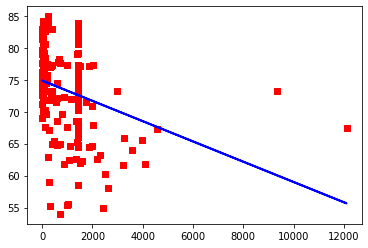

In [33]:

#With no normalize
lrm.fit(X.iloc[:,0:1],y)
plt.scatter(x=X.iloc[:,0:1],y=y,c='r',marker='s')
plt.plot(X.iloc[:,0:1],lrm.predict(X.iloc[:,0:1]),'k',color='blue',linewidth=2)


In [34]:
#Mean השונות של  
lrm.fit(X,y)
y_predct=lrm.predict(X)
mean_error=mean_squared_error(y.tolist(),y_predct)
print(mean_error)

8.038887112988473


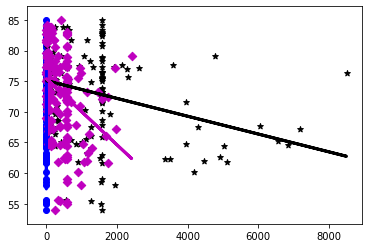

In [35]:

#3 linear rows that in data

lrm1=linear_model.LinearRegression()
lrm2=linear_model.LinearRegression()
lrm3=linear_model.LinearRegression()
lrm1.fit(X.iloc[:,5:6],y)
lrm2.fit(X.iloc[:,1:2],y)
lrm3.fit(X.iloc[:,2:3],y)
plt.scatter(x=X.iloc[:,5:6],y=y,c='b',marker='o')
plt.scatter(x=X.iloc[:,1:2],y=y,c='k',marker='*')
plt.scatter(x=X.iloc[:,2:3],y=y,c='m',marker='D')
plt.plot(X.iloc[:,5:6],lrm1.predict(X.iloc[:,5:6].values.reshape(X.iloc[:,5:6].shape[0],1)),c='b',linewidth=3)
plt.plot(X.iloc[:,1:2],lrm2.predict(X.iloc[:,1:2].values.reshape(X.iloc[:,1:2].shape[0],1)),c='k',linewidth=3)
plt.plot(X.iloc[:,2:3],lrm3.predict(X.iloc[:,2:3].values.reshape(X.iloc[:,2:3].shape[0],1)),c='m',linewidth=3)